In [29]:
import pandas as pd
from sklearn import tree
from pyprojroot import here
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_parquet(here("data/Binary/Titanic/titanic_cleaned.parquet"))
df.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,0,1,0,7.2500
2,1,1,1,1,0,71.2833
3,1,3,1,0,0,7.9250
4,1,1,1,1,0,53.1000
5,0,3,0,0,0,8.0500


In [15]:
y = df["Survived"]
x = df[["Pclass","Sex", "SibSp", "Parch","Fare"]].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
# Verify the class distribution in both training and testing sets
print("Class distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())

Class distribution in training set:
Survived
0    439
1    273
Name: count, dtype: int64

Class distribution in testing set:
Survived
0    110
1     69
Name: count, dtype: int64


In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
train_score = clf.score(x_train, y_train)
train_score

In [21]:
# Test the classifier on the test set
y_pred = clf.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

0.9297752808988764

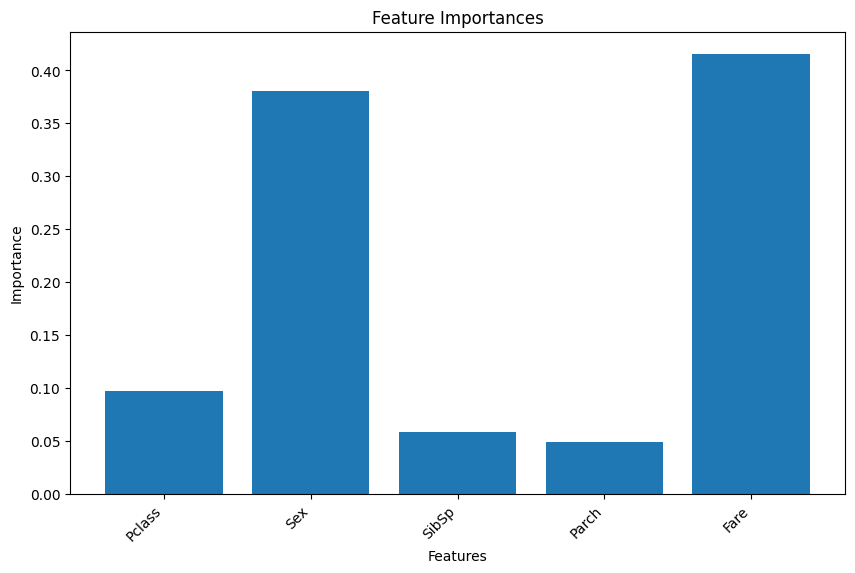

In [33]:
feature_importances = clf.feature_importances_
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=["Pclass","Sex", "SibSp", "Parch","Fare"])
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print()
report = classification_report(y_test, y_pred)
# Print the report
print("Classification Report:")
print(report)

Accuracy: 0.7653631284916201

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       110
           1       0.70      0.68      0.69        69

    accuracy                           0.77       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.77      0.76       179

